# Topic modelling

## Importations

In [1]:
import json
import numpy as np
import pandas as pd
from PIL import Image
import re
from nltk.tokenize import TweetTokenizer
import string
import nltk.corpus
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import matplotlib.pyplot as plt

## Tweets

### Data importation

We will import the cleaned tweets from previous step.

In [2]:
# Define companies' names and its products names
entities = ['Nintendo', 'Playstation', 'Xbox', 'Engage', 'Forspoken', 'HFRush']

In [3]:
# Import clean tweets
tweets = {}
for entity in entities:
    path = f'Videojocs/cleanTweets/{entity}.csv'
    tweets[entity] = pd.read_csv(path)
    tweets[entity] = tweets[entity].dropna() # Drop NaN values

### Exploratory data analysis

Once we have cleaned most of the unnecessary information from our data, we will perform a first exploratory analysis in order to identify which are the topics that are been talked about. To that purpouse, we will use a graphic representation called **wordcloud**, which consists on counting the most frequently tokens and showing them. This library uses clean text without urls, so we will pass that instead of just the tokens made.

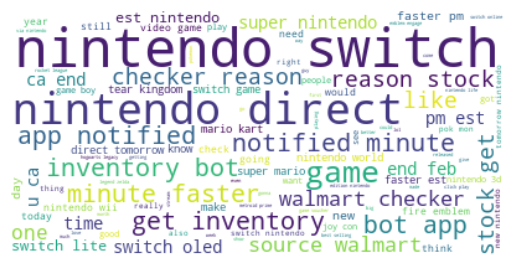

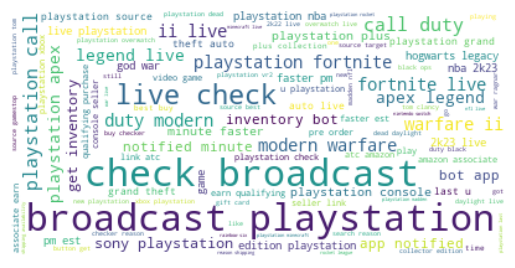

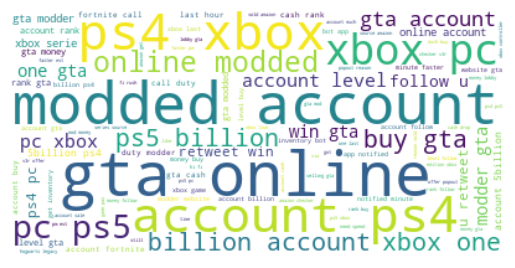

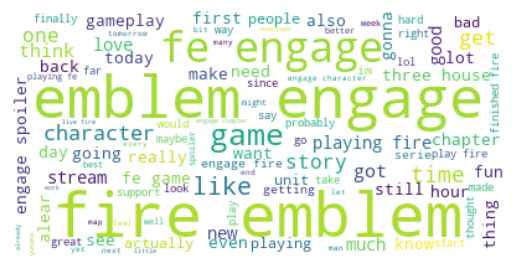

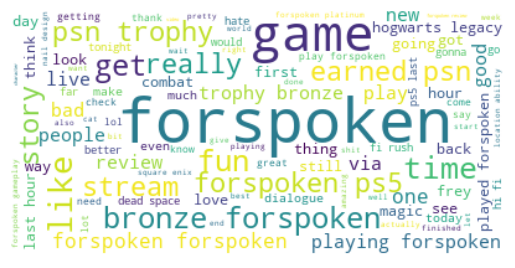

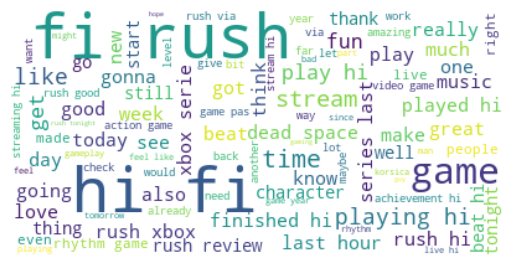

In [4]:
stopwords_vocabulary = stopwords.words('english')
for entity in entities:
    #tweetsMerged = " ".join(" ".join(token.lower() for token in review) for review in tweets[entity].final)
    tweetsMerged = " ".join(tweet for tweet in tweets[entity].lemmatizedText)
    #tweetsMerged = " ".join(review for review in tweets[entity].cleanText)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords = stopwords_vocabulary, background_color="white").generate(tweetsMerged)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    # Save image
    wordcloud.to_file(f"Wordcloud/wordclouds/{entity}.png")

### Topic modelling through LDA

#### Prepare data for analysis

First, we need to obtain the tokens from the lemmatized text generated during the data cleaning. After doing that, it will only remain to convert the tokenized objects into a **corpus** (structured set of texts which we are working with) and dictionary.

In [5]:
for entity in entities:
    tweets[entity]['tokens'] = tweets[entity]['lemmatizedText'].apply(TweetTokenizer().tokenize)

In [6]:
import gensim
# from gensim.utils import simple_preprocess # Tokenization through gensim
import gensim.corpora as corpora

id2word = {} # Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.
texts = {}
corpus = {} # Stream of document vectors or sparse matrix of shape (num_documents, num_terms)
for entity in entities:
    # Create Dictionary
    id2word[entity] = corpora.Dictionary(tweets[entity].tokens.tolist())
    # Create Corpus
    texts[entity] = tweets[entity].tokens.tolist()
    # Term Document Frequency
    corpus[entity] = [id2word[entity].doc2bow(text) for text in texts[entity]]
    # View
    #print(corpus[entity][:1][0][:30])

#### LDA model training

We have to decide parameters, specially the number of topics that we want to deal with. Each topic is a combination of keywords and each keyword contributes a certain wightage to the topic. In this case, we wil just consider 10 topics for each model.

In [12]:
from pprint import pprint

# number of topics
num_topics = 10

lda_model = {}
for entity in entities:
    # Build LDA model
    lda_model[entity] = gensim.models.LdaMulticore(corpus=corpus[entity], id2word=id2word[entity], num_topics=num_topics)
    # Print the Keyword in the 10 topics
    pprint(lda_model[entity].print_topics())
    #doc_lda = lda_model[entity][corpus]

[(0,
  '0.058*"nintendo" + 0.027*"game" + 0.010*"switch" + 0.010*"like" + '
  '0.008*"play" + 0.007*"u" + 0.007*"mario" + 0.006*"via" + 0.006*"end" + '
  '0.006*"direct"'),
 (1,
  '0.088*"nintendo" + 0.035*"switch" + 0.027*"direct" + 0.018*"game" + '
  '0.008*"new" + 0.007*"february" + 0.006*"xbox" + 0.006*"day" + 0.005*"play" '
  '+ 0.005*"want"'),
 (2,
  '0.039*"nintendo" + 0.022*"switch" + 0.021*"99" + 0.015*"game" + 0.015*"get" '
  '+ 0.014*"source" + 0.013*"minute" + 0.013*"reason" + 0.013*"inventory" + '
  '0.013*"est"'),
 (3,
  '0.052*"nintendo" + 0.023*"switch" + 0.015*"direct" + 0.012*"new" + '
  '0.012*"get" + 0.011*"mario" + 0.010*"99" + 0.009*"super" + 0.008*"end" + '
  '0.008*"feb"'),
 (4,
  '0.068*"nintendo" + 0.029*"switch" + 0.024*"game" + 0.020*"direct" + '
  '0.009*"tomorrow" + 0.006*"one" + 0.006*"go" + 0.006*"world" + 0.006*"via" + '
  '0.005*"new"'),
 (5,
  '0.067*"nintendo" + 0.022*"direct" + 0.022*"game" + 0.019*"switch" + '
  '0.015*"new" + 0.014*"mario" + 0.012

[(0,
  '0.053*"fi" + 0.052*"rush" + 0.050*"hi" + 0.038*"game" + 0.011*"play" + '
  '0.010*"stream" + 0.007*"beat" + 0.007*"much" + 0.006*"played" + '
  '0.006*"fun"'),
 (1,
  '0.065*"rush" + 0.064*"hi" + 0.063*"fi" + 0.036*"game" + 0.010*"live" + '
  '0.010*"stream" + 0.009*"fun" + 0.008*"playing" + 0.007*"play" + '
  '0.006*"good"'),
 (2,
  '0.049*"fi" + 0.049*"hi" + 0.047*"rush" + 0.030*"game" + 0.011*"rhythm" + '
  '0.008*"good" + 0.008*"play" + 0.007*"fun" + 0.007*"great" + 0.007*"much"'),
 (3,
  '0.047*"hi" + 0.046*"rush" + 0.044*"fi" + 0.034*"game" + 0.013*"play" + '
  '0.010*"one" + 0.008*"today" + 0.007*"gonna" + 0.006*"video" + 0.006*"week"'),
 (4,
  '0.068*"hi" + 0.067*"fi" + 0.065*"rush" + 0.020*"xbox" + 0.018*"last" + '
  '0.015*"series" + 0.014*"played" + 0.014*"hour" + 0.014*"24" + 0.011*"game"'),
 (5,
  '0.074*"rush" + 0.073*"fi" + 0.071*"hi" + 0.021*"game" + 0.014*"like" + '
  '0.013*"play" + 0.010*"fun" + 0.008*"good" + 0.007*"xbox" + 0.006*"played"'),
 (6,
  '0.078*"h

#### Analyze results

Once we have our model trained, let's save them and generate some interactive models in order to get a better understanding of the data.

In [13]:
import pyLDAvis.gensim
import pickle
import pyLDAvis

In [14]:
pyLDAvis.enable_notebook()
for entity in entities:
    LDAvis_data_filepath = f'Modelos/lda/modelos/{entity}_{num_topics}'#os.path.join('./results/ldavis_prepared_'+str(num_topics))
    lda_model[entity].save(LDAvis_data_filepath)
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model[entity], corpus[entity], id2word[entity])
    #with open(LDAvis_data_filepath, 'wb') as f: # Save model
        #pickle.dump(LDAvis_prepared, LDAvis_data_filepath)
    pyLDAvis.save_html(LDAvis_prepared, f'Modelos/lda/html/{entity}_{num_topics}.html') # Store as html

C:\Users\barri\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\barri\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\barri\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\barri\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_in

Now that we have all the models trained and stored, we can visualize them as a LDA notebook, which let us navigate through the different topics:

<ul>
    <li><a href="Modelos/lda/html/Nintendo_10.html">Nintendo</a></li>
    <li><a href="Modelos/lda/html/Playstation_10.html">Playstation</a></li>
    <li><a href="Modelos/lda/html/Xbox_10.html">Xbox</a></li>
    <li><a href="Modelos/lda/html/Engage_10.html">Fire Emblem Engage</a></li>
    <li><a href="Modelos/lda/html/Forspoken_10.html">Forspoken</a></li>
    <li><a href="Modelos/lda/html/HFRush_10.html">Hi-Fi Rush</a></li>
</ul>

## Reviews

### Data importation

We want to extract the main topics that are talked about among all the reviews made for each game. In order to do that, we will unify all the reviews (no matter if they are from users or professional reviewers) in order to have a decent amount of data to perform this task.

In [33]:
# Define games and platforms
games = [
    {'title': 'fire-emblem-engage', 'platform': 'switch', 'name': 'feSwitch'},
    {'title': 'hi-fi-rush', 'platform': 'xbox-series-x', 'name': 'hfrushXbox'},
    {'title': 'forspoken', 'platform': 'playstation-5', 'name': 'forspokenPS5'},
    {'title': 'hi-fi-rush', 'platform': 'pc', 'name': 'hfrushPc'},
    {'title': 'forspoken', 'platform': 'pc', 'name': 'forspokenPc'}
]

In [38]:
# Import reviews
reviews = {}
for game in games:
    user = pd.read_csv(f'Videojocs/cleanReviews/user_{game["name"]}.csv')
    scored = pd.read_csv(f'Videojocs/cleanReviews/scored_{game["name"]}.csv')
    unscored = pd.read_csv(f'Videojocs/cleanReviews/unscored_{game["name"]}.csv')
    frames = [user, scored, unscored]
    reviews[game["name"]] = pd.concat(frames)
    # Drop columns that are not necessary
    reviews[game["name"]] = reviews[game["name"]].drop(['source', 'link', 'date', 'grade', 'scoreType', 'upThumbs', 'totalThumbs', 'helpfulness'], axis=1)
    reviews[game["name"]] = reviews[game["name"]].dropna() # Drop NaN values

### Exploratory data analysis

Once we have cleaned most of the unnecessary information from our data, we will perform a first exploratory analysis in order to identify which are the topics that are been talked about. To that purpouse, we will use a graphic representation called **wordcloud**, which consists on counting the most frequently tokens and showing them. This library uses clean text without urls, so we will pass that instead of just the tokens made.

C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\an

C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\an

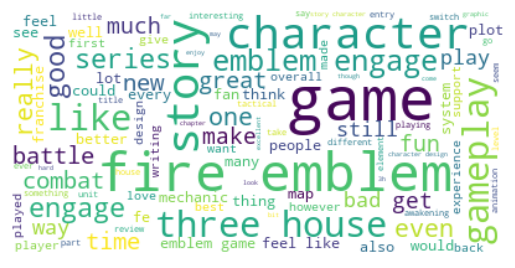

C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\an

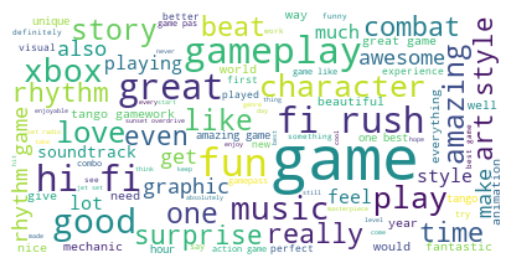

C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

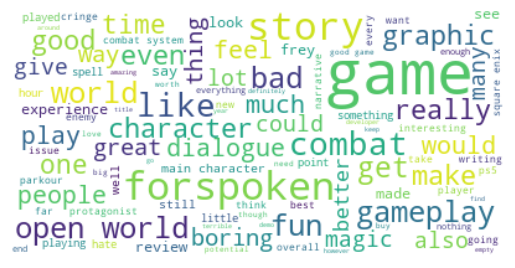

C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

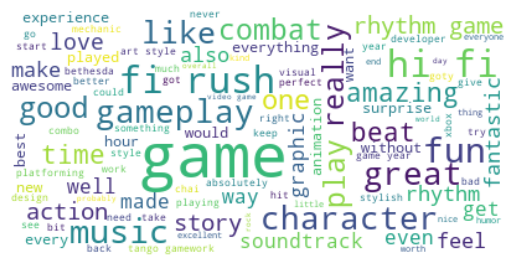

C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transpose

C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:519: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = (Image.ROTATE_90 if orientation is None else
C:\Users\barri\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=trans

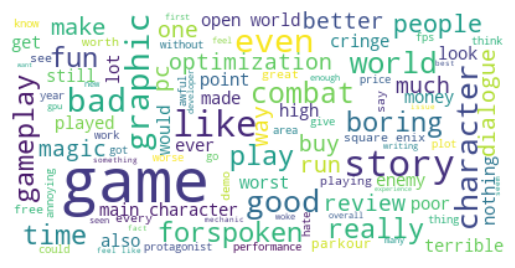

In [41]:
stopwords_vocabulary = stopwords.words('english')
for game in games:
    reviewsMerged = " ".join(review for review in reviews[game["name"]].lemmatizedText)
    # Create and generate a word cloud image:
    wordcloud = WordCloud(max_font_size=50, max_words=100, stopwords = stopwords_vocabulary, background_color="white").generate(reviewsMerged)
    # Display the generated image:
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    # Save image
    wordcloud.to_file(f"Wordcloud/wordclouds/{game['name']}.png")

### Topic modelling through LDA

#### Prepare data for analysis

First, we need to obtain the tokens from the lemmatized text generated during the data cleaning. After doing that, it will only remain to convert the tokenized objects into a **corpus** (structured set of texts which we are working with) and dictionary.

In [42]:
for game in games:
    reviews[game["name"]]['tokens'] = reviews[game["name"]]['lemmatizedText'].apply(TweetTokenizer().tokenize)

In [46]:
id2word = {} # Mapping from word IDs to words. It is used to determine the vocabulary size, as well as for debugging and topic printing.
texts = {}
corpus = {} # Stream of document vectors or sparse matrix of shape (num_documents, num_terms)
for game in games:
    # Create Dictionary
    id2word[game["name"]] = corpora.Dictionary(reviews[game["name"]].tokens.tolist())
    # Create Corpus
    texts[game["name"]] = reviews[game["name"]].tokens.tolist()
    # Term Document Frequency
    corpus[game["name"]] = [id2word[game["name"]].doc2bow(text) for text in texts[game["name"]]]

#### LDA model training

We have to decide parameters, specially the number of topics that we want to deal with. Each topic is a combination of keywords and each keyword contributes a certain wightage to the topic. In this case, we wil just consider 10 topics for each model.

In [48]:
# number of topics
num_topics = 10

lda_model = {}
for game in games:
    # Build LDA model
    lda_model[game["name"]] = gensim.models.LdaMulticore(corpus=corpus[game["name"]], id2word=id2word[game["name"]], num_topics=num_topics)
    # Print the Keyword in the 10 topics
    pprint(lda_model[game["name"]].print_topics())
    #doc_lda = lda_model[entity][corpus]

[(0,
  '0.029*"game" + 0.023*"emblem" + 0.022*"character" + 0.021*"fire" + '
  '0.019*"engage" + 0.015*"story" + 0.011*"series" + 0.010*"combat" + '
  '0.009*"like" + 0.009*"best"'),
 (1,
  '0.020*"game" + 0.018*"character" + 0.013*"emblem" + 0.012*"engage" + '
  '0.012*"fire" + 0.010*"three" + 0.009*"gameplay" + 0.009*"house" + '
  '0.009*"series" + 0.008*"story"'),
 (2,
  '0.031*"game" + 0.013*"character" + 0.013*"emblem" + 0.011*"fire" + '
  '0.010*"engage" + 0.008*"gameplay" + 0.008*"story" + 0.008*"series" + '
  '0.008*"good" + 0.007*"like"'),
 (3,
  '0.026*"game" + 0.017*"story" + 0.016*"emblem" + 0.014*"fire" + '
  '0.010*"engage" + 0.010*"gameplay" + 0.010*"character" + 0.009*"feel" + '
  '0.008*"good" + 0.007*"like"'),
 (4,
  '0.036*"emblem" + 0.035*"game" + 0.031*"fire" + 0.019*"engage" + '
  '0.015*"story" + 0.011*"character" + 0.010*"gameplay" + 0.010*"like" + '
  '0.010*"house" + 0.009*"fan"'),
 (5,
  '0.029*"game" + 0.018*"emblem" + 0.013*"character" + 0.012*"fire" + '
  

#### Analyze results

Once we have our model trained, let's save them and generate some interactive models in order to get a better understanding of the data.

In [50]:
pyLDAvis.enable_notebook()
for game in games:
    LDAvis_data_filepath = f'Modelos/lda/modelos/{game["name"]}_{num_topics}'#os.path.join('./results/ldavis_prepared_'+str(num_topics))
    lda_model[game["name"]].save(LDAvis_data_filepath)
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model[game["name"]], corpus[game["name"]], id2word[game["name"]])
    #with open(LDAvis_data_filepath, 'wb') as f: # Save model
        #pickle.dump(LDAvis_prepared, LDAvis_data_filepath)
    pyLDAvis.save_html(LDAvis_prepared, f'Modelos/lda/html/{game["name"]}_{num_topics}.html') # Store as html

C:\Users\barri\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\barri\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\barri\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_info.sort_values(
C:\Users\barri\anaconda3\lib\site-packages\pyLDAvis\_prepare.py:243: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  default_term_info = default_term_in

Now that we have all the models trained and stored, we can visualize them as a LDA notebook, which let us navigate through the different topics:

<ul>
    <li><a href="Modelos/lda/html/feSwitch_10.html">Fire Emblem Engage (Switch)</a></li>
    <li><a href="Modelos/lda/html/forspokenPc_10.html">Forspoken (Pc)</a></li>
    <li><a href="Modelos/lda/html/forspokenPS5_10.html">Forspoken (PS5)</a></li>
    <li><a href="Modelos/lda/html/hfrushPc_10.html">Hi-Fi Rush (Pc)</a></li>
    <li><a href="Modelos/lda/html/hfrushXbox_10.html">Hi-Fi Rush (Xbox Series X)</a></li>
</ul>

## Next notebook

In this notebook we have had first overview of the topics that are talked about through reviews and tweets. However, the model that we have used (LDA) is more focused on extracting topics from large texts and may not give the best results. Thus, in the next notebook we will use a specific topic model prepared specifically for short texts like tweets: the [biterm topic modelling](06Biterm.ipynb).